# Networkplot: Visualizing 2D Layouts

This example provides how to visualize 2D layouts using networkplot.

In [1]:
import graspologic

import numpy as np
import pandas as pd
%matplotlib inline

/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Visualizing 2D layout using networkplot

### Simulate an adjacency matrix using a stochastic block model

The 2-block model is defined as below:

\begin{align*}
P = 
\begin{bmatrix}0.25 & 0.05 \\
0.05 & 0.25
\end{bmatrix}
\end{align*}

More information on stochastic block models can be found [here](https://microsoft.github.io/graspologic/tutorials/simulations/sbm.html).

In [2]:
from graspologic.simulations import sbm

n_communities = [50, 50]
p = [[0.25, 0.05], [0.05, 0.25]]

np.random.seed(1)
A, node_ids = sbm(n_communities, p, return_labels=True)
print(A.shape)

(100, 100)


### Generate a 2D embedding using ASE

Adjacency Spectral Embed (ASE) reduces the dimensionality of the input adjacency matrix and estimates its latent positions, generating an embedding in a lower-dimensional space. In this example, ASE embeds the adjacency matrix generated by SBM to two-dimensional space and calculates its coordinates. 

More information on ASE can be found [here](https://microsoft.github.io/graspologic/tutorials/embedding/AdjacencySpectralEmbed.html?highlight=adjacency).

In [3]:
from graspologic.embed import AdjacencySpectralEmbed

ase = AdjacencySpectralEmbed(n_components=2)
X = ase.fit_transform(A)

print(X.shape)

(100, 2)


### Visualize 2D layout

Note that node colors were determined by communities that were randomly assigned and the node sizes are determined by the number of edges connected to each node. The edge colors for the plot below are based on their source nodes.

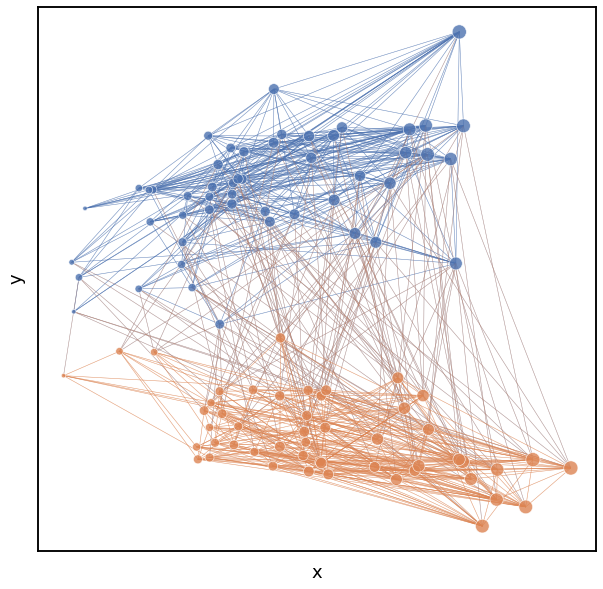

In [4]:
from graspologic.plot.plot import networkplot

x_pos = X[:,0]
y_pos = X[:,1]
degrees = np.sum(A, axis=0)

plot = networkplot(adjacency=A, x=x_pos, y=y_pos, node_hue=node_ids, palette='deep', node_size=degrees, 
                   node_sizes=(20, 200), edge_hue='source', edge_alpha=0.5, edge_linewidth=0.5)

Alternatively, we can also use a pandas dataframe and use x, y, node_hue, and node_size as keys. Note that for the plot below, the edge colors are determined by their target nodes by assigning edge_hue as 'target'.

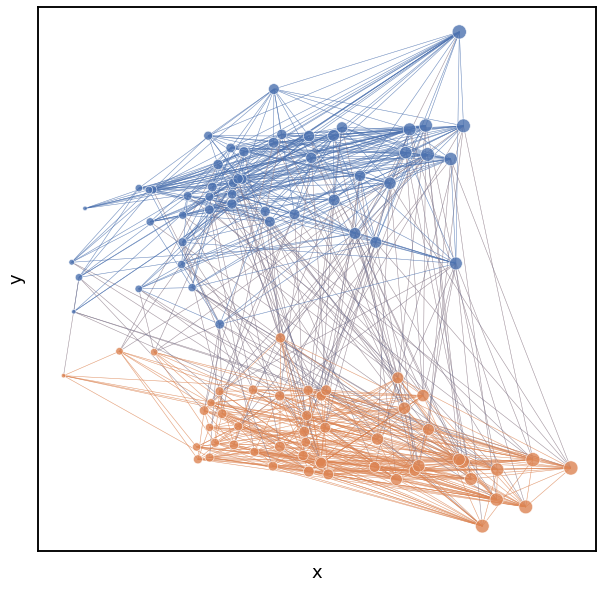

In [5]:
index = range(X.shape[0])
node_df = pd.DataFrame(index=index)
node_df.loc[:, 'x'] = X[:,0]
node_df.loc[:, 'y'] = X[:,1]
node_df.loc[:, 'id'] = node_ids
node_df.loc[:, 'degree'] = np.sum(A, axis=0)

plot = networkplot(adjacency=A, node_data=node_df, x='x', y='y', node_hue='id', palette='deep', 
                   node_size='degree', node_sizes=(20, 200), edge_hue='target', edge_alpha=0.5, edge_linewidth=0.5)